## Simple RNN

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

In [3]:
train_images, test_images = train_images /255.0, test_images /255.0

In [4]:
class_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

In [5]:
#train_images.shape, train_labels.shape, test_images.shape, test_labels.shape
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)


In [6]:
l=np.min(train_labels), "to" , np.max(train_labels)
l

(0, 'to', 9)

the pixel values range from: 0.0 to 1.0


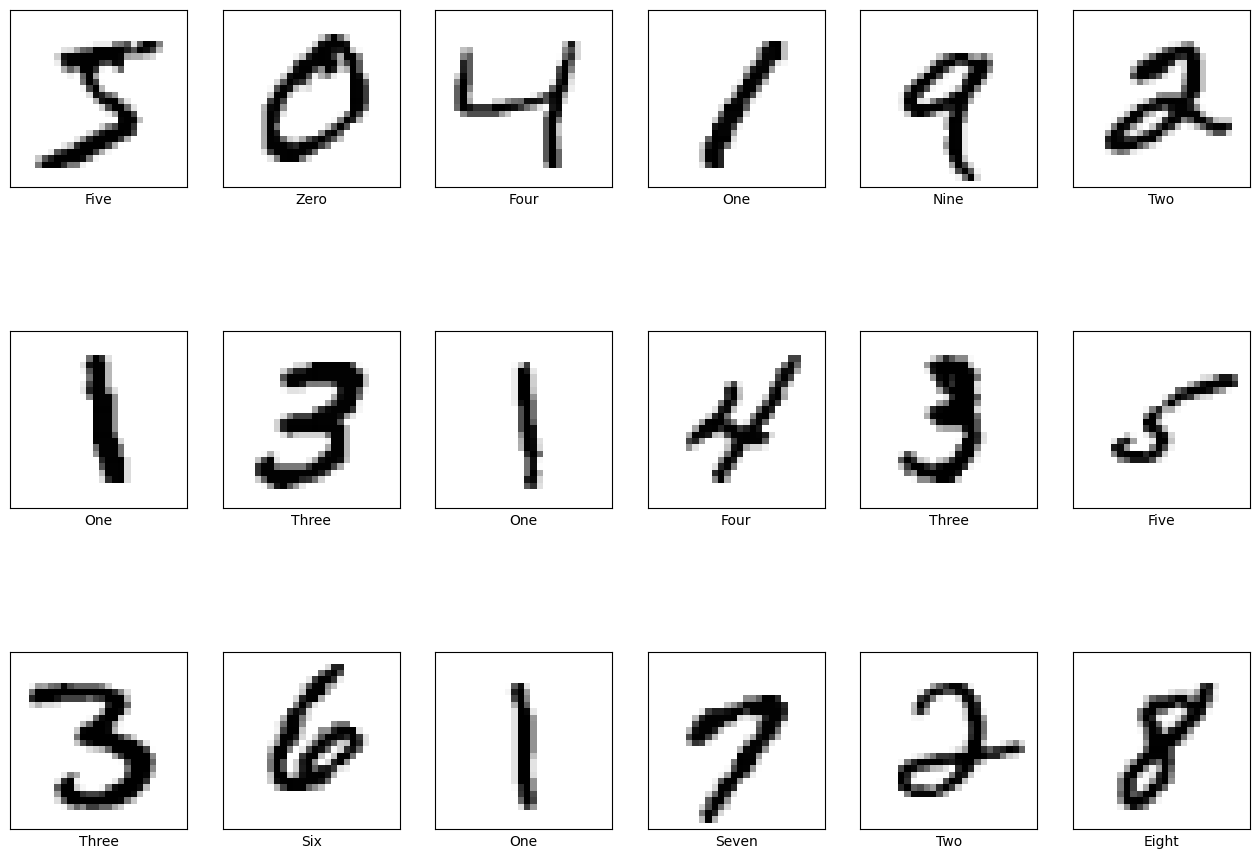

In [7]:
print("the pixel values range from:",np.min(train_images), "to" , np.max(train_images))
plt.figure(figsize=(16,16))

for i in range(18):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

**Setup and configure a Sequential model**

In [8]:
model = Sequential()
model.add(SimpleRNN(100, input_shape=(28,28)))
model.add(Dense(10, activation ='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               12900     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 13910 (54.34 KB)
Trainable params: 13910 (54.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compile the model**

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1375 - accuracy: 0.9615 - val_loss: 0.1615 - val_accuracy: 0.9558
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1298 - accuracy: 0.9632 - val_loss: 0.1551 - val_accuracy: 0.9577
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1225 - accuracy: 0.9658 - val_loss: 0.1166 - val_accuracy: 0.9661
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1258 - accuracy: 0.9645 - val_loss: 0.1329 - val_accuracy: 0.9641
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1239 - accuracy: 0.9653 - val_loss: 0.1214 - val_accuracy: 0.9657
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1164 - accuracy: 0.9676 - val_loss: 0.1155 - val_accuracy: 0.9658
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1265 - accuracy: 0.9644 - val_loss: 0.1390 - val_ac

In [16]:
test_loss, test_acc =model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy', round(test_acc*100),'%')

313/313 - 1s - loss: 0.1250 - accuracy: 0.9658 - 1s/epoch - 3ms/step
Test accuracy 97 %
